In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import utils
from model import BasicNetwork
from pathlib import Path
from torchvision.transforms.functional import pil_to_tensor
from PIL import Image
from torcheval.metrics import functional as torch_eval
import matplotlib.pyplot as plt


## Model training checks

In [12]:
data = Path("/home/gusandmich@GU.GU.SE/assignment_1/runs/thai_normal_200/data")
train_data = data/"training_set.txt"
train = utils.load_datasets([train_data], 1)

device = torch.device("cuda:0")

model = BasicNetwork(utils.NUM_CLASSES, 64)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.1)

loss_over_epochs = [] 

for epoch in range(2):
    loss_at_step = []
    for idx, data in enumerate(train.loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        # TODO check happy with the loss method here
        loss = criterion(outputs, labels)
        loss_at_step.append(loss.item())
        loss.backward()
        optimizer.step()
    loss_over_epochs.append(sum(loss_at_step) / len(loss_at_step))




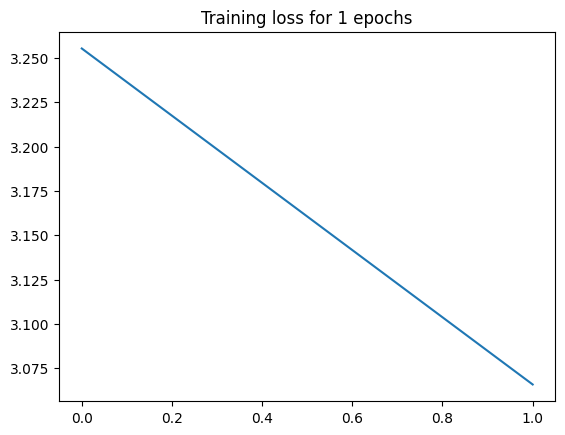

In [14]:
fig, ax = plt.subplots()
ax.set_title(f"Training loss for {epoch} epochs")
ax.plot(loss_over_epochs)
# fig.savefig(save_dir / "training_loss.png")


## Evaluation checks

In [2]:
data = Path("/home/gusandmich@GU.GU.SE/assignment_1/runs/thai_normal_200/data")
trained_model = Path("/home/gusandmich@GU.GU.SE/assignment_1/runs/thai_normal_200/outputs/model.pth")

In [3]:
# Try just loading the model first 
model = BasicNetwork(utils.NUM_CLASSES, 64)
device = torch.device("cuda:0")
model.load_state_dict(torch.load(trained_model, weights_only=True))
model.to(device) 

BasicNetwork(
  (feature): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=4, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=4, stride=2, padding=0)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2304, out_features=120, bias=True)
    (2): Tanh()
    (3): Linear(in_features=120, out_features=84, bias=True)
    (4): Tanh()
    (5): Linear(in_features=84, out_features=286, bias=True)
  )
)

In [7]:
# Load a test example
test_data = data/"testing_set.txt"
test = utils.load_datasets([test_data], 1)

for idx, data in enumerate(test.loader, 0):
    img, label = data[0].to(device), data[1].to(device)
    break



In [9]:
img

tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 0.7519, 0.7578, 0.7578],
          [1.0000, 1.0000, 1.0000,  ..., 0.9922, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.9922, 1.0000, 1.0000]]]],
       device='cuda:0')

In [10]:
label

tensor([199], device='cuda:0')

In [44]:
overall_true_labels = []
overall_predicted_labels = []

for idx, data in enumerate(test.loader, 0):
    inputs, labels = data[0].to(device), data[1].to(device)
    predicted = torch.argmax(model(inputs), dim=1)
    overall_true_labels.append(labels)
    overall_predicted_labels.append(predicted)


In [45]:
overall_true_labels

[tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([199], device='cuda:0'),
 tensor([1

In [49]:
trues = torch.cat(overall_true_labels)
preds = torch.cat(overall_predicted_labels)

In [52]:
torch_eval.multiclass_accuracy(preds, trues)

tensor(0.2870, device='cuda:0')

In [54]:
torch_eval.multiclass_recall(preds, trues)

tensor(0.2870, device='cuda:0')

In [71]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

In [73]:
print(precision_score(trues.cpu(), preds.cpu(), average='macro'))
print(recall_score(trues.cpu(), preds.cpu(), average='macro'))
print(f1_score(trues.cpu(), preds.cpu(), average='macro'))
print(accuracy_score(trues.cpu(), preds.cpu()))

0.2538544775889427
0.27350490986854625
0.1958249102518531
0.287004662004662


/usr/local/lib64/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
